In [1]:
 from google.colab import drive
 drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd '/content/drive/My Drive/Colab Notebooks/dl/data' 

/content/drive/.shortcut-targets-by-id/1ZyNJXaTInYA2YPBLOAFnql__PhYO31aJ/data


In [3]:
import numpy as np
import pandas as pd
import pickle as pkl
from tabulate import tabulate
import os
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Initiating Feature Analysis and Selection for all Students who voluntarily reported having taken a course or a specialization

In [4]:
# Loading Students data set from a pickle file - All features are ready for analysis and selection!
df_converted_students = pd.read_pickle("./converted_students01272021.pkl")

In [5]:
import pickle as pkl
def Load_Dicts(pkl_filename):
  All_Dicts = pkl.load( open (pkl_filename, "rb"))
  Dict_Opt= All_Dicts[0]
  Events_Dict= All_Dicts[1]
  Education_Dict= All_Dicts[2]
  Jobs_Dict= All_Dicts[3]
  Countries_Dict = All_Dicts[4]
  Companies_Dict = All_Dicts[5]
  First_Pages_Dict = All_Dicts[6]
  Last_Pages_Dict = All_Dicts[7]
  Courses_Dict= All_Dicts[8]
  return Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict, Courses_Dict

In [6]:
# Loading all dictionaries (categorical features) from a pickle file
Dict_Opt, Events_Dict, Education_Dict, Jobs_Dict, Countries_Dict, Companies_Dict, First_Pages_Dict, Last_Pages_Dict, Courses_Dict= Load_Dicts("all_dictionaries.pkl")

In [7]:
binary_columns = ['Opted out of email: Events and Community', 'Opted out of email: Program Announcements', 'Opted out of email: The Batch', 'Unsubscribed from all email', 'AI For Everyone', 'Deep Learning Specialization', 'Natural Language Processing Specialization', 'AI for Medicine Specialization', 'TensorFlow Developer Professional Certificate','TensorFlow: Data and Deployment Specialization']
numeric_columns = ['Number of Pageviews','Average Pageviews','Number of Sessions','Marketing emails opened', 'Marketing emails delivered','Marketing emails clicked', 'Total Education Effort']
timestamp_columns = ['Became a Lead Date', 'Became a Subscriber Date', 'First Conversion Date', 'First marketing email click date', 'First marketing email open date', 'First marketing email send date', 'Last marketing email click date', 'Last marketing email open date', 'Last marketing email send date','Last Registered Event Date']
categorical_columns = ['First Page Seen Path', 'Last Page Seen Path', 'Last Registered Event','Last marketing email name','Highest level of completed education', 'Job Title or Function', 'IP Country', 'Associated Company ID']

In [8]:
def drop_crr(df,tol=0.8):
	crr = df_std.corr().abs()
	keep_columns = df.columns.to_list()
	keep_dict = {clm:True for clm in keep_columns}
	for i in range(0,len(keep_columns)-1):
		# Loop over all columns to the right of the current one
	    	for j in range(i+1,len(keep_columns)):
	    		# If the absolute correlation between the current two columns is greater than or equal to 0.8...
	    		if crr[keep_columns[i]].loc[keep_columns[j]] >= tol:
	    			# If we haven't already told the keep_columns list to drop column j...
	    			if keep_dict[keep_columns[j]] == True:
	    				# Drop column j
	    				keep_dict[keep_columns[j]] = False
	selected_columns = [clm for clm in keep_dict if keep_dict[clm] == True]
	return selected_columns

In [9]:
df_std = df_converted_students[numeric_columns]
selected = drop_crr(df_std)
all = df_std.columns
drop = list(set(all)^set(selected))

In [10]:
drop

['Number of Sessions', 'Marketing emails delivered']

In [11]:
df_converted_students = df_converted_students.drop(columns=drop)

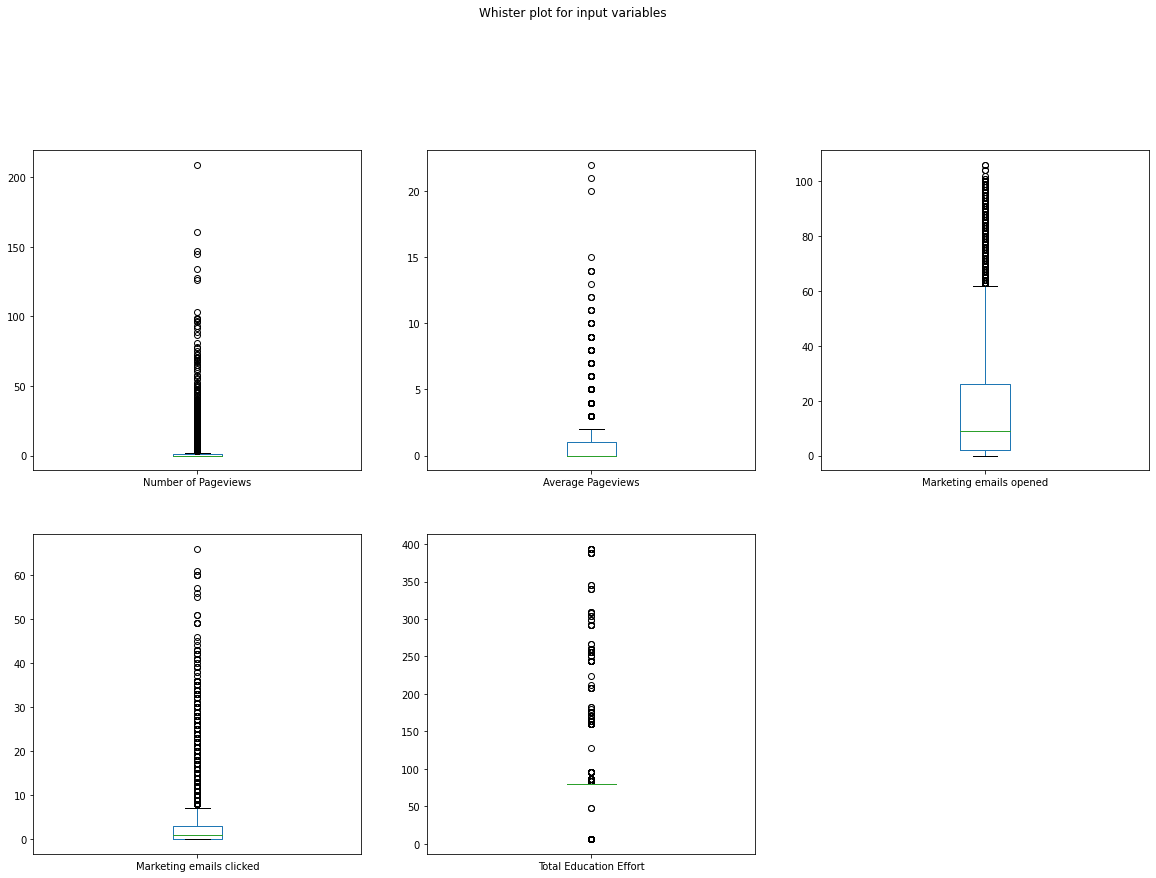

In [12]:
# Whiskerplots
c = 'black'
df_std[selected].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20,20),
                                        title='Whister plot for input variables')
plt.savefig('Numeric Features')
plt.show()